In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Error Calculator

In [15]:
class ErrorCalculator:
    
    def __init__(self, y, y_pred):
        import numpy as np
        self.y= np.array(y)
        self.y_pred= np.array(y_pred)
        self.size= len(y)
        self.check_size(y, y_pred)
        
    def check_size(self, y, y_pred):
        if len(self.y)== len(self.y_pred):
            return True
        else:
            raise ValueError(f'damn bro. size {self.y} and {self.y_pred}')
            
    def get_residuals(self):
        #for each in self.y:
        #    total_res= self.y_pred- self.y
        #return total_res
        return self.y_pred- self.y
    
    
    def get_standardised_residuals(self):
        resids= self.get_residuals()
        self.std_resids= self.standard_scaler(resids)
        #self.std_y_pred=  self.standard_scaler(self.y_pred)
        #return self.std_y, self.std_y_pred
        return self.std_resids
        
    
    def standard_scaler(self, a):
        standard_dev= np.std(a)
        average= a.mean()
        a_std= (a- average)/ standard_dev
        return a_std  
        
    
    def get_mse(self):
        my_mse= sum((self.y_pred -self.y)**2/  len(self.y))
        return my_mse
    
    def get_rmse(self):
        rmse= math.sqrt(self.get_mse())
        return rmse
    
    def error_summary(self):
        resids= self.get_standardised_residuals()
        print('error summary:')
        print(f'average standard residuals: {resids.mean()}')
        print(f'minimum standard residuals: {min(resids)}')
        print(f'maximum standard residuals: {max(resids)}')
        print(f'MSE: {self.get_mse()}')
        print(f'RMSE: {self.get_rmse()}')

In [16]:
a= [17,100,3]
b=[2,10, 4]

errors= ErrorCalculator(a,b)
errors.get_standardised_residuals()

array([ 0.49578081, -1.39490873,  0.89912792])

In [17]:
errors.get_rmse()

52.68143252924443

In [18]:
errors.error_summary()

error summary:
average standard residuals: -7.401486830834377e-17
minimum standard residuals: -1.3949087322891296
maximum standard residuals: 0.8991279178008244
MSE: 2775.3333333333335
RMSE: 52.68143252924443


# Plotter

In [19]:
class Plotter:
    def __init__(self, y, y_pred, residuals=None):
        self.residuals= residuals
        self.y= y
        self.y_pred= y_pred
    
    def run_calculations(self):
        resids= np.array(self.y)- np.array(self.y_pred)
        return resids
    
    def plot(self):
        if self.residuals is None:
            self.residuals= self.run_calculations()
        plt.hist(self.residuals)

In [20]:
b

[2, 10, 4]

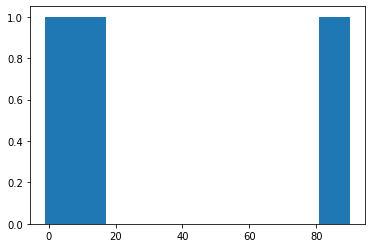

In [21]:
plots= Plotter(a,b)
plots.plot()

# Histogram plotter

In [22]:
class HistogramPlotter(Plotter):
    #same thing as its parent, so no need to do anything.
    #use initialization of parent Plotter too
    def __init__(self, y, y_pred):
        super().__init__(y, y_pred)


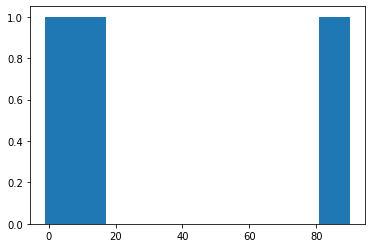

In [23]:
my_hist= HistogramPlotter(a, b)
my_hist.plot()

# ScatterPlotter

In [24]:
class ScatterPlotter(Plotter):
    def __init__(self, y, y_pred):
        super().__init__(y, y_pred)
    def plot(self):
       # plt.scatter(self.y, self.y_pred)
        if self.residuals is None:
            self.residuals= self.run_calculations()
        plt.scatter(self.residuals, self.y_pred)

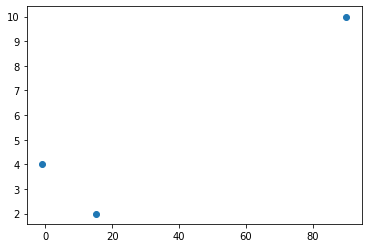

In [25]:
my_scatter= ScatterPlotter(a,b)
my_scatter.plot()